# **IMPLEMENTATION DU FRAMEWORK DE MON ARTICLE DE BASE AVEC OPTIMISATION DE PARAMETRES PAR DETECTION D"ANOMALIES ET SELECTION AUTOMATIQUE DE VARIABLES**

## **Thème :** Apprentissage par ensemble pour la prédiction de la résistance à la compression des bétons de hautes performances (BHPs) 

### **Auteur** : ANANJOU TSAFACK Ornéla Stéla

### **Encadreurs**: Dr. TIOGNING Lauraine et Dr. MELATAGIA Paulin

## **I) Thématique**


*   **Thème** : Prédiction de la résistance mécanique des bétons de hautes performances (BHPs).

*   **Question Scientifique** : Quel modèle d'apprentissage par ensemble permet de prédire au mieux la résistance à la compression des BHPs?

*   **Objectif Scientifique** : Construire un modèle d'apprentissage par ensemble qui prédise efficacement la résistance à la compression des BHPs



##  **II) Données utilisées**

### **1) Informations sur les Données** :
Le jeu de donné provient de https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength sous
le nom de **Concrete Compressive Strength DataSet** .
Il compte **1030 observations** , **9 variables**( *ciment, scories de haut fourneaux, cendres volantes, l’eau, le super-plastifiant, les agrégats de coarse, les particules fines, l’âge* ) et une variable cible correspondant à la ***résistance mécanique***.


### **2) Présentation des données**

In [2]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import IsolationForest

In [3]:
#creation d'un dataframe panda
df=pd.read_excel("Concrete_Data.xls")
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Cement (component 1)(kg in a m^3 mixture),540.000000,540.000000,332.500000,332.50000,198.600000,266.000000,380.000000,380.00000,266.000000,475.00000,198.600000,198.600000,427.50000,190.000000,304.000000,380.00000,139.600000,342.000000,380.000000,475.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.000000,0.000000,142.500000,142.50000,132.400000,114.000000,95.000000,95.00000,114.000000,0.00000,132.400000,132.400000,47.50000,190.000000,76.000000,0.00000,209.400000,38.000000,95.000000,0.000000
Fly Ash (component 3)(kg in a m^3 mixture),0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Water (component 4)(kg in a m^3 mixture),162.000000,162.000000,228.000000,228.00000,192.000000,228.000000,228.000000,228.00000,228.000000,228.00000,192.000000,192.000000,228.00000,228.000000,228.000000,228.00000,192.000000,228.000000,228.000000,228.000000
Superplasticizer (component 5)(kg in a m^3 mixture),2.500000,2.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1040.000000,1055.000000,932.000000,932.00000,978.400000,932.000000,932.000000,932.00000,932.000000,932.00000,978.400000,978.400000,932.00000,932.000000,932.000000,932.00000,1047.000000,932.000000,932.000000,932.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),676.000000,676.000000,594.000000,594.00000,825.500000,670.000000,594.000000,594.00000,670.000000,594.00000,825.500000,825.500000,594.00000,670.000000,670.000000,670.00000,806.900000,670.000000,594.000000,594.000000
Age (day),28.000000,28.000000,270.000000,365.00000,360.000000,90.000000,365.000000,28.00000,28.000000,28.00000,90.000000,28.000000,270.00000,90.000000,28.000000,90.00000,90.000000,365.000000,90.000000,180.000000
"Concrete compressive strength(MPa, megapascals)",79.986111,61.887366,40.269535,41.05278,44.296075,47.029847,43.698299,36.44777,45.854291,39.28979,38.074244,28.021684,43.01296,42.326932,47.813782,52.90832,39.358048,56.141962,40.563252,42.620648


In [4]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# Ici on fractionne notre dataset et 90 et 10 comme l'article de base (leur dataset etait de 1228 exemples)

# 

# X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.1,random_state=42)

#### 1)La normalisation du dataset

In [6]:
# Normalisation z-score ou standardisation
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

normData=scaler.fit_transform(data)

normData

array([[ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  2.64519215],
       [ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  1.5612771 ],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -2.24091255,
         3.55306569,  0.26660766],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ...,  0.08012724,
        -0.27973311, -0.7259282 ],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.19118775,
        -0.27973311, -0.18264932],
       [-0.19401043,  0.30850389,  0.37696733, ..., -0.15072887,
        -0.27973311, -0.20461667]])

In [7]:
normData=pd.DataFrame(normData)
X = normData.iloc[:,:-1]
y = normData.iloc[:,-1]

In [8]:
X

,0,1,2,3,4,5,6,7
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733


In [9]:
X,y = np.array(X), np.array(y)

In [10]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.1,random_state=42)

In [11]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

regressors ={
    "XGBRegressor":XGBRegressor(random_state = 42),
    "CatBoostRegressor": CatBoostRegressor(random_state=42),
    "LGBMRegressor":LGBMRegressor(random_state=42)
}

df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'mse','mae','r2'])

for key in regressors:

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # scores = cross_val_score(model, 
    #                          X_train, 
    #                          y_train,
    #                          scoring="neg_mean_squared_error", 
    #                          cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': format(mean_squared_error(y_test, y_pred,squared=False),".3"),
           'mse': format(mean_squared_error(y_test, y_pred),".3"),
           'mae': format(mean_absolute_error(y_test,y_pred),".3"),
           'r2' : format(r2_score(y_test,y_pred),"0.3")
    }

    df_models = df_models.append(row, ignore_index=True)

df_models.head()

Learning rate set to 0.040456
0:	learn: 0.9789471	total: 61.9ms	remaining: 1m 1s
1:	learn: 0.9547247	total: 65ms	remaining: 32.5s
2:	learn: 0.9337936	total: 67.4ms	remaining: 22.4s
3:	learn: 0.9102877	total: 69.5ms	remaining: 17.3s
4:	learn: 0.8883285	total: 71.4ms	remaining: 14.2s
5:	learn: 0.8684798	total: 73.6ms	remaining: 12.2s
6:	learn: 0.8479259	total: 75.2ms	remaining: 10.7s
7:	learn: 0.8276483	total: 77.2ms	remaining: 9.57s
8:	learn: 0.8091077	total: 79.6ms	remaining: 8.77s
9:	learn: 0.7916951	total: 81.4ms	remaining: 8.06s
10:	learn: 0.7761726	total: 82.9ms	remaining: 7.45s
11:	learn: 0.7584598	total: 84.1ms	remaining: 6.92s
12:	learn: 0.7424750	total: 85.4ms	remaining: 6.49s
13:	learn: 0.7269283	total: 86.7ms	remaining: 6.11s
14:	learn: 0.7127226	total: 88.4ms	remaining: 5.81s
15:	learn: 0.6983184	total: 89.7ms	remaining: 5.52s
16:	learn: 0.6854174	total: 91.2ms	remaining: 5.27s
17:	learn: 0.6720991	total: 92.9ms	remaining: 5.07s
18:	learn: 0.6598277	total: 94.7ms	remaining: 

,model,run_time,rmse,mse,mae,r2
0,XGBRegressor,0.01,0.255,0.0651,0.165,0.932
1,CatBoostRegressor,0.04,0.222,0.0493,0.152,0.948
2,LGBMRegressor,0.01,0.243,0.0591,0.177,0.938


##### Tune the Isolation Forest model

In [12]:
model = IsolationForest(random_state=42)

param_grid = {
              'contamination': ['auto',0,0.05, 0.1,0.15,0.2,0.25,0.30,0.35,0.4,0.45,0.5]            
              }

grid_search = GridSearchCV(model,param_grid,scoring="neg_mean_squared_error", 
                        refit=True,return_train_score=True)
grid_search.fit(X, y)

best_model = grid_search.fit(X, y)

print('Optimum parameters', best_model.best_params_)


Optimum parameters {'contamination': 0.05}


In [13]:
print('Best loss', best_model.best_score_)

Best loss -2.3889616686543658


##### Run the tuned Isolation Forest model

In [14]:
# Now we will fit an IsolationForest model to the training data (not the 
# test data) using the optimum settings we identified using the grid search above.

# Running the Isolation Forest model will return a Numpy array of predictions
# containing the outliers we need to remove. 

iforest=IsolationForest(random_state=42, contamination=0.05)

# Perform fit on X and returns labels for X. Returns -1 for outliers and 1 for inliers.
iforest_y_pred = iforest.fit_predict(X)

iforest_y_pred.shape


(1030,)

Remove the outliers

In [15]:


X_iforest, y_iforest = X[(iforest_y_pred != -1), :], y[(iforest_y_pred != -1)]

In [16]:
print(X_iforest.shape, y_iforest.shape)


(978, 8) (978,)


In [17]:
X_train,X_test,y_train,y_test =train_test_split(X_iforest,y_iforest,test_size=0.1,random_state=42)
X_train.shape,X_test.shape

((880, 8), (98, 8))


Refit the regression model

In [18]:
regressors ={
    "XGBRegressor":XGBRegressor(random_state = 42),
    "CatBoostRegressor": CatBoostRegressor(random_state=42),
    "LGBMRegressor":LGBMRegressor(random_state=42)
}

df_models = pd.DataFrame(columns=['model', 
                                #   'run_time', 
                                  'rmse', 'mse'])

for key in regressors:

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # scores = cross_val_score(model, 
    #                          X_train, 
    #                          y_train,
    #                          scoring="neg_mean_squared_error", 
    #                          cv=10)

    row = {'model': key.upper(),
        #    'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': format(mean_squared_error(y_test, y_pred,squared=False),".3"),
           'mse': format(mean_squared_error(y_test, y_pred),".3"),
           'mae': format(mean_absolute_error(y_test,y_pred),".3"),
           'r2' : format(r2_score(y_test,y_pred),"0.3")
    }

    df_models = df_models.append(row, ignore_index=True)

df_models.head()


Learning rate set to 0.040124
0:	learn: 0.9691775	total: 1.41ms	remaining: 1.41s
1:	learn: 0.9463556	total: 2.63ms	remaining: 1.31s
2:	learn: 0.9256188	total: 3.86ms	remaining: 1.28s
3:	learn: 0.9037990	total: 5.13ms	remaining: 1.28s
4:	learn: 0.8832628	total: 6.52ms	remaining: 1.3s
5:	learn: 0.8652119	total: 8.16ms	remaining: 1.35s
6:	learn: 0.8448705	total: 10.4ms	remaining: 1.47s
7:	learn: 0.8258769	total: 11.7ms	remaining: 1.44s
8:	learn: 0.8072750	total: 12.9ms	remaining: 1.42s
9:	learn: 0.7902880	total: 14.2ms	remaining: 1.41s
10:	learn: 0.7743994	total: 15.5ms	remaining: 1.39s
11:	learn: 0.7574841	total: 16.7ms	remaining: 1.38s
12:	learn: 0.7421668	total: 17.9ms	remaining: 1.36s
13:	learn: 0.7260514	total: 19.2ms	remaining: 1.35s
14:	learn: 0.7123536	total: 20.3ms	remaining: 1.33s
15:	learn: 0.6983643	total: 21.7ms	remaining: 1.33s
16:	learn: 0.6839070	total: 24ms	remaining: 1.39s
17:	learn: 0.6717291	total: 25.6ms	remaining: 1.4s
18:	learn: 0.6597593	total: 27ms	remaining: 1.4s

,model,rmse,mse,mae,r2
0,XGBREGRESSOR,0.236,0.0555,0.148,0.937
1,CATBOOSTREGRESSOR,0.202,0.0409,0.132,0.953
2,LGBMREGRESSOR,0.228,0.052,0.157,0.941


#### Information mutuelle

In [19]:
X_iforest.shape

(978, 8)

In [20]:
mutual_info = mutual_info_regression(X_iforest, y_iforest)
mutual_info

array([0.26939991, 0.18744814, 0.13671869, 0.36543049, 0.23385531,
       0.23404446, 0.20508077, 0.37583563])

In [20]:
mutual_info = pd.Series(index=["Cement","BlastFurnaceSlag","FlyAsh","Water","Superplasticizer","CoarseAggregate","FineAggregare","Age"], data=mutual_info)

# mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Age                 0.374695
Water               0.367191
Cement              0.263606
CoarseAggregate     0.232495
Superplasticizer    0.230255
FineAggregare       0.202320
BlastFurnaceSlag    0.190541
FlyAsh              0.137580
dtype: float64

<AxesSubplot: >

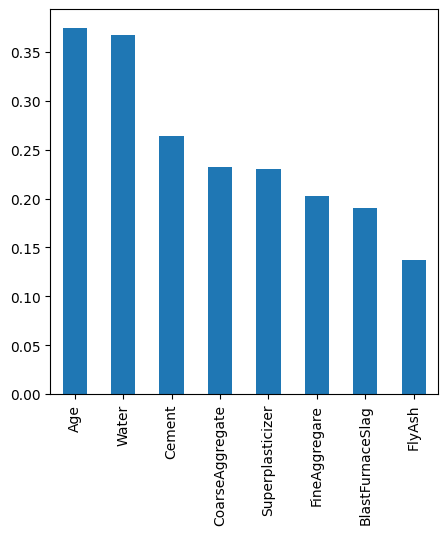

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(5,5))

In [22]:
X_train

array([[ 0.14010026, -0.85688631, -0.84713204, ...,  1.52454205,
        -0.05339494, -0.27973311],
       [-0.93116011,  0.56477377, -0.84713204, ..., -0.17652196,
         0.32970141, -0.61233136],
       [-1.09486478,  2.04441347, -0.84713204, ...,  0.03450262,
        -1.01051189,  0.7022236 ],
       ...,
       [ 0.30476227,  0.82452243, -0.84713204, ...,  0.34846602,
         0.604233  , -0.27973311],
       [ 1.57802081, -0.57858418,  0.38791074, ..., -0.07615661,
        -0.76842494, -0.6756834 ],
       [ 0.40719736,  2.42244054, -0.84713204, ..., -0.38883328,
        -1.41856565, -0.27973311]])

In [23]:
X_iforest_total=pd.DataFrame(data=X_iforest,columns=["Cement","BlastFurnaceSlag","FlyAsh","Water","Superplasticizer","CoarseAggregate","FineAggregare","Age"])
y_iforest_total = y_iforest
y_iforest_total

array([ 2.64519215e+00,  1.56127710e+00,  5.07752952e-01,  6.71475741e-01,
        3.77260913e-02,  6.01072877e-01,  2.07931724e-01,  1.35133924e-01,
       -4.66903467e-01,  3.89822994e-01,  7.18424747e-01,  1.02353135e+00,
        2.12019633e-01,  2.84198052e-01,  3.60464380e-01, -4.53979071e-01,
       -1.66218305e+00,  5.02467576e-01,  1.04702650e+00,  3.19420130e-01,
        9.76582345e-01,  9.64020264e-02,  1.66846182e-01,  3.53444740e-01,
       -3.43646841e-01,  1.14033711e-01,  3.83959530e-01,  8.76862160e-01,
        1.03525828e+00,  3.42873987e-01, -4.44037010e-02, -1.24381249e+00,
        2.95924981e-01, -5.72528409e-01, -1.79345964e-01,  2.37249046e-01,
        6.65612277e-01, -1.61755571e-01,  8.00554540e-01, -1.27135425e+00,
       -1.26842252e+00, -1.59822174e+00,  9.06179481e-01, -1.67619036e-01,
        1.11156590e+00,  9.53128488e-01, -1.55420447e+00,  8.88589088e-01,
        7.71237218e-01,  1.15265144e+00, -3.31919912e-01,  3.01788445e-01,
        2.16620493e+00, -

In [24]:
# from sklearn.feature_selection import SelectKBest

# def select_features(X_train, y_train, X_test):
#  # configure to select a subset of features
#  fs = SelectKBest(score_func=mutual_info_regression, k=6)
#  # learn relationship from training data
#  fs.fit(X_train, y_train)
#  # transform train input data
#  X_train_fs = fs.transform(X_train)
#  # transform test input data
#  X_test_fs = fs.transform(X_test)
#  return X_train_fs, X_test_fs, fs


# sel_five_cols = SelectKBest(mutual_info_regression, k=6)
# sel_five_cols.fit(X_train, y_train)
# X_train.columns[sel_five_cols.get_support()]

In [25]:
from sklearn.feature_selection import SelectKBest

def select_features(X_total, y_total,K):
 # configure to select a subset of features
 fs = SelectKBest(score_func=mutual_info_regression, k=K)
 # learn relationship from training data
 fs.fit(X_total, y_total)
 # transform train input data
 X_fs = fs.transform(X_total)
#  # transform test input data
#  X_test_fs = fs.transform(X_test)
 return X_fs, fs

In [26]:

# X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
X_fs,fs = select_features(X_iforest_total,y_iforest_total,7)
fs

SelectKBest(k=7, score_func=<function mutual_info_regression at 0x7fde59c6c670>)

In [27]:
X_train_fs,X_test_fs,y_train_fs,y_test_fs = train_test_split(X_fs,y_iforest_total,test_size=0.1,random_state=42)
X_train_fs.shape, X_test_fs.shape

((880, 7), (98, 7))

#### 3) Entrainement des différents modèles

In [28]:
regressors ={
    "XGBRegressor":XGBRegressor(random_state = 42),
    "CatBoostRegressor": CatBoostRegressor(random_state=42),
    "LGBMRegressor":LGBMRegressor(random_state=42)
}

df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'mse','mae','r2'])

for key in regressors:

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train_fs, y_train_fs)
    y_pred = model.predict(X_test_fs)

    # scores = cross_val_score(model, 
    #                          X_train, 
    #                          y_train,
    #                          scoring="neg_mean_squared_error", 
    #                          cv=10)

    row = {'model': key.upper(),
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': format(mean_squared_error(y_test_fs, y_pred,squared=False),".3"),
           'mse': format(mean_squared_error(y_test_fs, y_pred),".3"),
           'mae': format(mean_absolute_error(y_test_fs,y_pred),".3"),
           'r2' : format(r2_score(y_test_fs,y_pred),"0.3")
    }

    df_models = df_models.append(row, ignore_index=True)

df_models.head()


Learning rate set to 0.040124
0:	learn: 0.9677986	total: 1.47ms	remaining: 1.47s
1:	learn: 0.9444087	total: 2.63ms	remaining: 1.31s
2:	learn: 0.9231150	total: 3.87ms	remaining: 1.28s
3:	learn: 0.9006465	total: 5.31ms	remaining: 1.32s
4:	learn: 0.8788567	total: 6.72ms	remaining: 1.34s
5:	learn: 0.8568074	total: 7.96ms	remaining: 1.32s
6:	learn: 0.8366436	total: 9.13ms	remaining: 1.29s
7:	learn: 0.8174393	total: 10.3ms	remaining: 1.27s
8:	learn: 0.7984159	total: 11.4ms	remaining: 1.26s
9:	learn: 0.7802577	total: 12.5ms	remaining: 1.24s
10:	learn: 0.7622719	total: 13.7ms	remaining: 1.23s
11:	learn: 0.7471116	total: 15ms	remaining: 1.23s
12:	learn: 0.7316687	total: 16.5ms	remaining: 1.26s
13:	learn: 0.7171048	total: 18.1ms	remaining: 1.27s
14:	learn: 0.7036384	total: 19.2ms	remaining: 1.26s
15:	learn: 0.6883426	total: 20.5ms	remaining: 1.26s
16:	learn: 0.6745765	total: 21.7ms	remaining: 1.25s
17:	learn: 0.6621243	total: 22.9ms	remaining: 1.25s
18:	learn: 0.6491717	total: 24ms	remaining: 1.

,model,run_time,rmse,mse,mae,r2
0,XGBREGRESSOR,0.0,0.237,0.0562,0.151,0.936
1,CATBOOSTREGRESSOR,0.03,0.201,0.0405,0.134,0.954
2,LGBMREGRESSOR,0.0,0.24,0.0574,0.171,0.935


#### Catboost and XGBoost optimise

In [29]:
# random_state = 42,alpha=0.51, eta = 0.17,gamma= 0.00,lambda= 0.35, max_bin= 1734, max_depth= 14,
#  min_child_weight= 6.02, subsample= 0.85
regressors ={
    "XGBRegressor":XGBRegressor( reg_lambda= 0.35,max_bin= 1734,random_state = 42,reg_alpha=0.51,eta = 0.17,gamma= 0.00,max_depth= 14,min_child_weight= 6.02, subsample= 0.85),
    "CatBoostRegressor": CatBoostRegressor(random_state=42, bagging_temperature= 25.71, l2_leaf_reg= 3.82, learning_rate= 0.18,
    max_bin= 1531, min_data_in_leaf= 26, random_strength= 3.10, subsample= 0.97)
    # "LGBMRegressor":LGBMRegressor(random_state=42)
}

df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'mse','mae','r2'])

for key in regressors:

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train_fs, y_train_fs)
    y_pred = model.predict(X_test_fs)

    # scores = cross_val_score(model, 
    #                          X_train, 
    #                          y_train,
    #                          scoring="neg_mean_squared_error", 
    #                          cv=10)

    row = {'model': key.upper(),
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': format(mean_squared_error(y_test_fs, y_pred,squared=False),".3"),
           'mse': format(mean_squared_error(y_test_fs, y_pred),".3"),
           'mae': format(mean_absolute_error(y_test_fs,y_pred),".3"),
           'r2' : format(r2_score(y_test_fs,y_pred),"0.3")
    }

    df_models = df_models.append(row, ignore_index=True)

df_models.head()


0:	learn: 0.8926825	total: 2.22ms	remaining: 2.22s
1:	learn: 0.8206713	total: 3.76ms	remaining: 1.88s
2:	learn: 0.7444797	total: 4.92ms	remaining: 1.64s
3:	learn: 0.6867076	total: 6.14ms	remaining: 1.53s
4:	learn: 0.6399866	total: 7.31ms	remaining: 1.45s
5:	learn: 0.6074487	total: 8.59ms	remaining: 1.42s
6:	learn: 0.5763854	total: 9.84ms	remaining: 1.4s
7:	learn: 0.5423339	total: 11.3ms	remaining: 1.41s
8:	learn: 0.5154514	total: 14.3ms	remaining: 1.58s
9:	learn: 0.4857546	total: 15.6ms	remaining: 1.55s
10:	learn: 0.4629946	total: 16.8ms	remaining: 1.51s
11:	learn: 0.4448578	total: 18.1ms	remaining: 1.49s
12:	learn: 0.4253108	total: 19.3ms	remaining: 1.47s
13:	learn: 0.4095858	total: 20.6ms	remaining: 1.45s
14:	learn: 0.4025225	total: 21.9ms	remaining: 1.44s
15:	learn: 0.3904877	total: 23.1ms	remaining: 1.42s
16:	learn: 0.3806943	total: 24.3ms	remaining: 1.4s
17:	learn: 0.3676805	total: 25.9ms	remaining: 1.41s
18:	learn: 0.3592848	total: 27.5ms	remaining: 1.42s
19:	learn: 0.3536160	tot

,model,run_time,rmse,mse,mae,r2
0,XGBREGRESSOR,0.0,0.228,0.0518,0.157,0.941
1,CATBOOSTREGRESSOR,0.03,0.219,0.0479,0.139,0.945


##### Regression de Lasso pour la selection de variable

In [25]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_iforest, y_iforest)
print(clf.coef_)

[ 0.41274577  0.16890248  0.         -0.11248699  0.2400374  -0.
 -0.          0.3224636 ]


In [31]:
b=np.argsort(clf.coef_)[-7:]

In [37]:
d = np.concatenate([np.reshape(X_iforest[:,x], (X_iforest.shape[0],1))  for x in b], axis=1)

In [38]:
d.shape

(978, 7)

In [41]:
X_train_fs,X_test_fs,y_train_fs,y_test_fs = train_test_split(d,y_iforest,test_size=0.1,random_state=42)
X_train_fs.shape, X_test_fs.shape

((880, 7), (98, 7))

In [42]:

regressors ={
    "XGBRegressor":XGBRegressor( reg_lambda= 0.35,max_bin= 1734,random_state = 42,reg_alpha=0.51,eta = 0.17,gamma= 0.00,max_depth= 14,min_child_weight= 6.02, subsample= 0.85),
    "CatBoostRegressor": CatBoostRegressor(random_state=42, bagging_temperature= 25.71, l2_leaf_reg= 3.82, learning_rate= 0.18,
    max_bin= 1531, min_data_in_leaf= 26, random_strength= 3.10, subsample= 0.97)
    # "LGBMRegressor":LGBMRegressor(random_state=42)
}

df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'mse','mae','r2'])

for key in regressors:

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train_fs, y_train_fs)
    y_pred = model.predict(X_test_fs)

    # scores = cross_val_score(model, 
    #                          X_train, 
    #                          y_train,
    #                          scoring="neg_mean_squared_error", 
    #                          cv=10)

    row = {'model': key.upper(),
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': format(mean_squared_error(y_test_fs, y_pred,squared=False),".3"),
           'mse': format(mean_squared_error(y_test_fs, y_pred),".3"),
           'mae': format(mean_absolute_error(y_test_fs,y_pred),".3"),
           'r2' : format(r2_score(y_test_fs,y_pred),"0.3")
    }

    df_models = df_models.append(row, ignore_index=True)

df_models.head()

0:	learn: 0.8999808	total: 2.97ms	remaining: 2.97s
1:	learn: 0.8289446	total: 3.96ms	remaining: 1.98s
2:	learn: 0.7676878	total: 5.57ms	remaining: 1.85s
3:	learn: 0.7008182	total: 6.82ms	remaining: 1.7s
4:	learn: 0.6604184	total: 8.21ms	remaining: 1.63s
5:	learn: 0.6124535	total: 9.67ms	remaining: 1.6s
6:	learn: 0.5769447	total: 11.3ms	remaining: 1.6s
7:	learn: 0.5459101	total: 12.8ms	remaining: 1.58s
8:	learn: 0.5128722	total: 14.2ms	remaining: 1.56s
9:	learn: 0.5008519	total: 15.7ms	remaining: 1.55s
10:	learn: 0.4841218	total: 17.1ms	remaining: 1.54s
11:	learn: 0.4682753	total: 18.5ms	remaining: 1.52s
12:	learn: 0.4523295	total: 20ms	remaining: 1.51s
13:	learn: 0.4415926	total: 21.9ms	remaining: 1.54s
14:	learn: 0.4293417	total: 23.7ms	remaining: 1.56s
15:	learn: 0.4160844	total: 25.3ms	remaining: 1.55s
16:	learn: 0.4099680	total: 26.7ms	remaining: 1.55s
17:	learn: 0.4023771	total: 28.2ms	remaining: 1.54s
18:	learn: 0.3976933	total: 29.6ms	remaining: 1.53s
19:	learn: 0.3905426	total:

,model,run_time,rmse,mse,mae,r2
0,XGBREGRESSOR,0.01,0.226,0.051,0.148,0.942
1,CATBOOSTREGRESSOR,0.03,0.188,0.0354,0.13,0.96


#### Regression de ridge pour la selection des variables

In [45]:
from sklearn.linear_model import Ridge

clf_ridge = Ridge()
clf_ridge.fit(X_iforest, y_iforest)
clf_ridge.coef_

array([ 0.71894627,  0.48709907,  0.25799597, -0.2066892 ,  0.18396346,
        0.0602696 ,  0.03593189,  0.54693449])

##### SVR pour la selection des caracteristiques

In [54]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# C=1.0, epsilon=0.2

#svr =  make_pipeline( SVR())
svr =  SVR(kernel='linear')
svr.fit(X_iforest, y_iforest)

SVR(kernel='linear')

In [56]:
coef = svr.coef_[0]
coef

array([ 0.8066813 ,  0.56949359,  0.31258403, -0.18500028,  0.15337362,
        0.10279789,  0.10563654,  0.80722421])

#### Elastic net for variable selection

In [64]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(random_state=0,alpha=0.3)
en.fit(X_iforest, y_iforest)

ElasticNet(alpha=0.3, random_state=0)

In [65]:
print(en.coef_)

[ 0.28815716  0.06511443 -0.         -0.05784163  0.16810085 -0.
 -0.          0.17300587]


In [68]:
from sklearn.metrics.cluster import normalized_mutual_info_score
mscs = [normalized_mutual_info_score(X_iforest[:,i], y_iforest) for i in range(X_iforest.shape[1])]
mscs

[0.866421111136896,
 0.645437021404801,
 0.5869405068980021,
 0.793321094283471,
 0.6852852593335992,
 0.8545321624217428,
 0.8692935817728344,
 0.4173059378686703]